<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

### How to get help
In [ODS Slack](https://opendatascience.slack.com) (if you still don't have access, fill in the [form](https://docs.google.com/forms/d/1BMqcUc-hIQXa0HB_Q2Oa8vWBtGHXk8a6xo5gPnMKYKA/edit) mentioned on the mlcourse.ai main page), we have a channel **#mlcourse_ai_news** with announcements from the course team.
You can discuss the course content freely in the **#mlcourse_ai** channel (we still have a huge Russian-speaking group, they have a separate channel **#mlcourse_ai_rus**).

Here's how you reply in a thread (press this dialog icon to drill down into a thread):

<img src="../../img/start_a_thread.png" />

Please stick to special threads for your questions:
 - [#a1_q1-5](https://opendatascience.slack.com/archives/C91N8TL83/p1549882488049500) for questions 1-5 below
 - [#a1_q6-10](https://opendatascience.slack.com/archives/C91N8TL83/p1549882494049700) for questions 6-10 below
 - [#a1_q11-15](https://opendatascience.slack.com/archives/C91N8TL83/p1549882499049900) for questions 11-15 below
 - [#a1_q16-20](https://opendatascience.slack.com/archives/C91N8TL83/p1549882508050200) for questions 16-20 below
 
Help each other without sharing correct code and answers. Our TA Maxim @maximkeremet is there to help (only in the mentioned threads, do not write to him directly).

Lastly, you can save useful messages by pinning them, further you can find pinned items on the top, just below the channel name:

<img src="../../img/pinned_item.png" />

In [1]:
import numpy as np
import pandas as pd



* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [3]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [ ]:
path = '/Users/aleksandr/Desktop/python/ml open spring/ml1/2008.csv.bz2'

name_file = pd.read_xls("name")

In [4]:
%%time
# change the path if needed
path = '/Users/aleksandr/Desktop/python/ml open spring/ml1/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 1min 4s, sys: 2.94 s, total: 1min 6s
Wall time: 1min 11s


**Check the number of rows and columns and print column names.**

In [10]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [5]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [7]:
flights_df['DepTime'].value_counts()

555.0     17227
600.0     16436
2056.0    15929
2116.0    15244
700.0     15169
2124.0    15147
655.0     15123
2120.0    14783
557.0     14686
556.0     14563
2104.0    14537
2112.0    14304
2128.0    14164
558.0     14071
2108.0    13837
2052.0    13245
2136.0    12644
2132.0    12575
559.0     12566
2140.0    12052
658.0     11849
657.0     11849
656.0     11834
755.0     11419
825.0     11305
659.0     11222
630.0     11190
900.0     11183
855.0     11066
2144.0    11027
          ...  
352.0         8
242.0         8
413.0         8
414.0         8
418.0         8
308.0         7
422.0         7
425.0         7
337.0         7
253.0         7
357.0         7
254.0         7
416.0         7
349.0         7
348.0         7
343.0         7
341.0         6
421.0         6
353.0         6
312.0         6
420.0         5
429.0         5
336.0         5
302.0         5
344.0         4
342.0         4
338.0         4
417.0         3
347.0         3
346.0         3
Name: DepTime, Length: 1

In [8]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


In [ ]:
flights_df.hist

**Transpose the frame to see all features at once.**

In [12]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [15]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [ ]:
flights_df.describe().T

**Count unique Carriers and plot their relative share of flights:**

In [ ]:
flights_df['UniqueCarrier'].nunique()

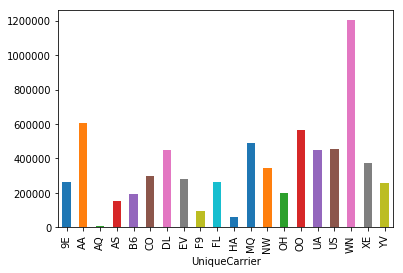

In [11]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [ ]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

**Another way:**

In [ ]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

**Number of flights by days of week and months:**

In [ ]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

**It can also be handy to color such tables in order to easily notice outliers:**

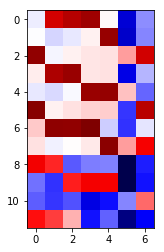

In [4]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

In [9]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [ ]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [10]:
num_flights_by_date = flights_df.groupby('Date').size()

KeyError: 'Date'

In [ ]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

In [ ]:
num_flights_by_date.rolling(window=7).mean().plot();

**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, `DepTime` is distributed from 1 to 2400 (it is given in the `hhmm` format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as `DepTime` // 100 (divide by 100 and apply the `floor` function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column `DepHour` will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them. 

In [4]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [ ]:
flights_df['DepHour'].describe()

In [ ]:
flights_df.head()

### Now it's your turn. Answer the questions below.

In [ ]:
flights_df["UniqueCarrier"].unique()

**1. How many unique carriers are there in our dataset?**

- 10
- 15
- 20
- 25 

In [ ]:
## otvet na 1 = 20 unique

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [ ]:
flights_good = flights_df[flights_df['Cancelled'] != 1]

In [ ]:
flights_bad = flights_df[flights_df['Cancelled'] != 0]

In [ ]:
len(flights_good)

In [ ]:
len(flights_bad)

In [ ]:
6872294 - 137434

In [ ]:
#Completed overweights cancelled by 6734860 flights

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [6]:
flights_df['DepDelay'].max()

2468.0

In [7]:
flights_df[flights_df['DepDelay'] == 2468]

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour
2235378,2008,4,10,4,724.0,NW,1699,2452.0,2468.0,CLT,MSP,930,0,NaN,2436.0,0.0,0.0,0.0,17.0,7.0


In [8]:
flights_df['ArrDelay'].max()

2460.0

In [9]:
flights_df[flights_df['ArrDelay'] == 2460]

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour
1018798,2008,2,3,7,1117.0,NW,808,2460.0,2456.0,HNL,MSP,3972,0,NaN,1455.0,0.0,4.0,0.0,1002.0,11.0


In [ ]:
# otvet na msp

**4. Find the carrier that has the greatest number of cancelled flights.**

- AA
- MQ
- WN
- CO 

In [ ]:
pd.crosstab(flights_bad.UniqueCarrier, flights_bad.Cancelled)

In [ ]:
# otvet na 4 MQ 

**5. Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

- 1 am 
- 5 am  
- 8 am
- 3 pm 

In [19]:
flights_df['DepHour'].value_counts()

8.0     449224
6.0     446737
11.0    444702
7.0     436700
13.0    435917
9.0     434850
16.0    434017
17.0    432488
10.0    431460
12.0    424249
14.0    416875
15.0    411126
18.0    400784
19.0    387288
20.0    285991
21.0    254850
5.0     148167
22.0    119651
23.0     46103
0.0      20368
1.0       5861
4.0       3390
2.0       1851
3.0        833
Name: DepHour, dtype: int64

In [26]:
# otvet = 8 am

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

- 2 am
- 9 pm  
- 8 am  
- 3 am 

In [20]:
pd.crosstab(flights_bad.DepHour, flights_bad.Cancelled)

Cancelled,1
DepHour,
0.0,7
1.0,4
2.0,1
4.0,1
5.0,24
6.0,80
7.0,83
8.0,79
9.0,56


In [27]:
# 2 am

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

- 3
- 19
- 22
- 4 

In [28]:
#  3 am

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.

- 4
- 7
- 8
- 17 

In [81]:
pd.crosstab(flights_good.DepHour, flights_good.Cancelled)

Cancelled,0
DepHour,
0.0,20361
1.0,5857
2.0,1850
3.0,833
4.0,3389
5.0,148143
6.0,446657
7.0,436617
8.0,449145


In [29]:
# 8

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-6 am
- yes, at 9-10 am
- yes, at 2-4 pm

In [ ]:
flights_good['DepHour']DepDelay

In [86]:
flights_good.groupby('DepHour')['DepDelay'].mean()

DepHour
0.0      70.750000
1.0     111.812500
2.0     122.562500
3.0      95.812500
4.0       3.375000
5.0      -4.253906
6.0      -1.629883
7.0       0.102539
8.0       1.760742
9.0       3.753906
10.0      5.460938
11.0      6.683594
12.0      7.902344
13.0      8.812500
14.0     10.351562
15.0     11.875000
16.0     11.882812
17.0     13.210938
18.0     15.343750
19.0     16.875000
20.0     22.781250
21.0     23.031250
22.0     38.031250
23.0     60.000000
Name: DepDelay, dtype: float16

In [30]:
# yes, at 5-6 am

In [87]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,20.0
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,7.0
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,6.0
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,9.0
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03,18.0


**10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

- at noon
- at 7 am 
- at 8 am
- at 10 am

In [93]:
pd.crosstab( flights_good['DepHour'], flights_good['UniqueCarrier'] == "MQ",)

UniqueCarrier,False,True
DepHour,,
0.0,20198,163
1.0,5843,14
2.0,1846,4
3.0,833,0
4.0,3389,0
5.0,135411,12732
6.0,415675,30982
7.0,406777,29840
8.0,420388,28757


In [31]:
# at 10 am

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV

In [94]:
flights_good['UniqueCarrier'].value_counts()

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
EV     275549
FL     259448
9E     255108
YV     245711
B6     192886
OH     191145
AS     148963
F9      95459
HA      61256
AQ       7758
Name: UniqueCarrier, dtype: int64

In [32]:
# EV

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- Carrier
- Weather conditions
- National Air System
- Security reasons

In [21]:
flights_bad['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [33]:
# Weather conditions

**13. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [22]:
flights_df['way'] = flights_df['Origin'] + flights_df['Dest'] 

In [23]:
flights_df['way'].value_counts().head(1)

SFOLAX    13788
Name: way, dtype: int64

In [34]:
# San-Francisco – Los-Angeles (SFO-LAX)

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [24]:
a = flights_df[flights_df['DepDelay'] > 0]

In [25]:
a['way'].value_counts()
depart = a.loc[a['way'].isin(['LAXSFO','DALHOU', 'SFOLAX', 'ORDLGA', 'HOUDAL'])]
depart.fillna(0) 
depart[depart['WeatherDelay'] > 0]

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,way
402,2008,1,3,4,2008.0,WN,646,129.0,123.0,LAX,...,337,0,NaN,0.0,24.0,6.0,0.0,99.0,20.0,LAXSFO
3841,2008,1,4,5,1440.0,WN,680,236.0,230.0,LAX,...,337,0,NaN,0.0,202.0,6.0,0.0,28.0,14.0,LAXSFO
5334,2008,1,4,5,1946.0,WN,442,113.0,101.0,SFO,...,337,0,NaN,0.0,70.0,12.0,0.0,31.0,19.0,SFOLAX
7014,2008,1,5,6,1604.0,WN,656,93.0,94.0,LAX,...,337,0,NaN,0.0,93.0,0.0,0.0,0.0,16.0,LAXSFO
7016,2008,1,5,6,1533.0,WN,776,156.0,168.0,LAX,...,337,0,NaN,0.0,150.0,0.0,0.0,6.0,15.0,LAXSFO
9998,2008,1,6,7,1549.0,WN,656,76.0,79.0,LAX,...,337,0,NaN,0.0,48.0,0.0,0.0,28.0,15.0,LAXSFO
16748,2008,1,8,2,2220.0,WN,593,148.0,146.0,LAX,...,337,0,NaN,0.0,29.0,2.0,0.0,117.0,22.0,LAXSFO
27062,2008,1,11,5,1207.0,WN,680,79.0,77.0,LAX,...,337,0,NaN,0.0,77.0,2.0,0.0,0.0,12.0,LAXSFO
42690,2008,1,16,3,2204.0,WN,62,28.0,34.0,HOU,...,239,0,NaN,0.0,2.0,0.0,0.0,26.0,22.0,HOUDAL
49548,2008,1,18,5,2144.0,WN,60,35.0,43.0,HOU,...,239,0,NaN,0.0,17.0,0.0,0.0,18.0,21.0,HOUDAL


In [35]:
# 668

**15. Examine the hourly distribution of departure times. Choose all correct statements:**

 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [26]:
flights_df['vremya'] = round(flights_df['DepTime'] / 100)

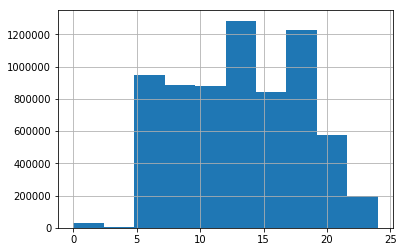

In [27]:
flights_df['vremya'].hist()

In [36]:
# ### otvet na 5 - tolko In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). 
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Northern Hemisphere.

DayOfWeek
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
2    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
3    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
4    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
5    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
6    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
7    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

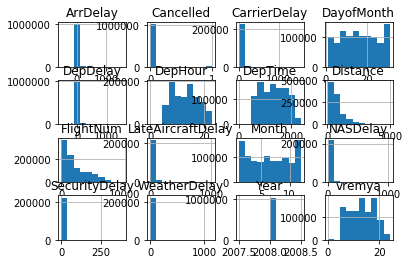

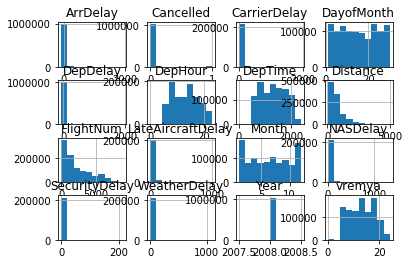

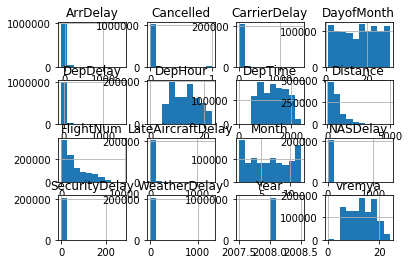

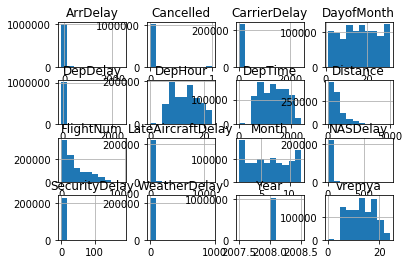

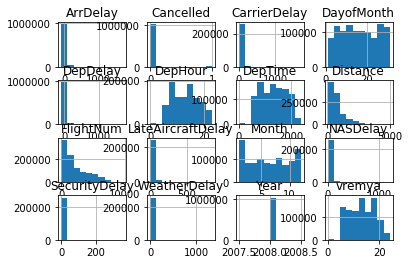

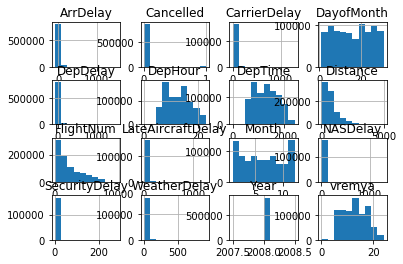

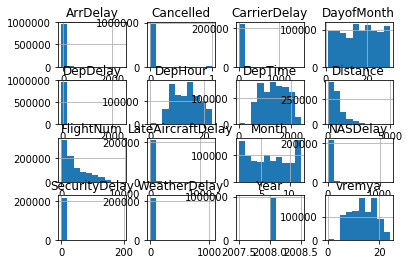

In [28]:
flights_df.groupby('DayOfWeek').hist()

In [ ]:
flights_df['DayOfWeek'].hist()

In [ ]:
sns.countplot(flights_df['DayOfWeek'])


In [ ]:
sns.countplot(flights_df['DayofMonth'])

In [ ]:
sns.countplot(flights_df['Month'])

In [37]:
# ## otvet na 6 -- There are less flights during winter than during summer. 
## The number of flights during weekends is less than during weekdays (working days).

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. 
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

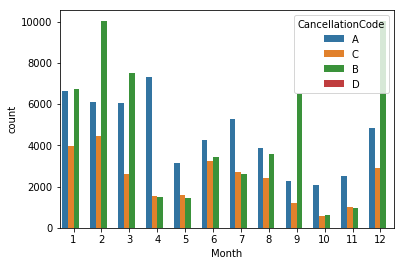

In [29]:
sns.countplot(x = 'Month', hue = 'CancellationCode', data = flights_bad)

In [30]:
pd.crosstab(flights_bad['Month'], flights_bad['CancellationCode'])

CancellationCode,A,B,C,D
Month,,,,
1,6635,6711,3962,0
2,6090,10034,4470,2
3,6038,7520,2621,4
4,7312,1479,1564,0
5,3157,1461,1608,3
6,4251,3448,3232,0
7,5292,2612,2694,0
8,3852,3582,2401,0
9,2246,6478,1188,1


In [38]:
# ## otvet na 7 - December has the highest rate of cancellations due to weather 
# April's top cancellation reason is carriers.
# October has the lowest number of cancellations due to weather.


**18. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April

In [39]:
## April

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [31]:
f4 = flights_bad[flights_bad['Month'] == 4]

In [32]:
pd.crosstab( f4['UniqueCarrier'], f4['CancellationCode'],)

CancellationCode,A,B,C
UniqueCarrier,,,
9E,391,59,64
AA,3696,131,91
AS,135,23,0
B6,43,55,29
CO,50,33,4
DL,226,31,62
EV,29,17,74
F9,7,0,0
FL,81,8,40


In [40]:
# ## otvet -- AA

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

- EV
- OO
- AA
- AQ

In [33]:
f = flights_df[(flights_df['ArrDelay'] >= 0) & (flights_df['DepDelay'] >= 0)]

In [34]:
f.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,way,vremya
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,IADTPA,8.0
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDBWI,6.0
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,0,NaN,2.0,0.0,0.0,0.0,32.0,18.0,INDBWI,18.0
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,INDJAX,19.0
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,...,0,NaN,10.0,0.0,0.0,0.0,47.0,19.0,INDLAS,19.0


In [35]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,way,vremya
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,IADTPA,20.0
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,IADTPA,8.0
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDBWI,6.0
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,INDBWI,9.0
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,0,NaN,2.0,0.0,0.0,0.0,32.0,18.0,INDBWI,18.0


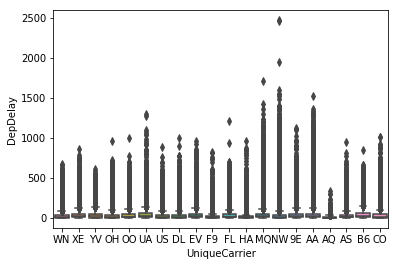

In [36]:
sns.boxplot(x = 'UniqueCarrier', y= 'DepDelay', data = f);

In [37]:
c = f[f['DepDelay'] <= 30]

In [38]:
c.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,way,vremya
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,IADTPA,8.0
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDBWI,6.0
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,INDJAX,19.0
8,2008,1,3,4,617.0,WN,11,2.0,2.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDMCI,6.0
10,2008,1,3,4,706.0,WN,100,1.0,6.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,INDMCO,7.0


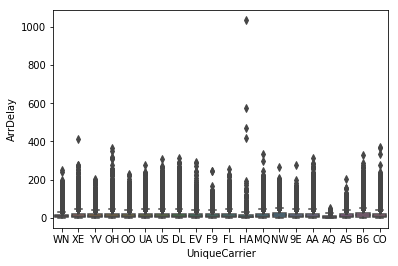

In [39]:
sns.boxplot(x = 'UniqueCarrier', y= 'ArrDelay', data = c);

In [ ]:
## AQ

That's it! Now go and do 30 push-ups! :)